# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import weather_api_key
import random
import json

## Generate Cities List

In [2]:
# Read json of cities and city IDs
citylist = pd.read_json('F:\Matt\GitHome\py-api-challenge\citylist.json')
# Select sample of cities
cityselect = pd.DataFrame(citylist.sample(600))
cityselect.head()

,id,name,state,country,coord
50098,2143724,Wiangaree,,AU,"{'lon': 152.966675, 'lat': -28.51667}"
114198,3111443,Rodilana,,ES,"{'lon': -4.87798, 'lat': 41.37059}"
91018,2935573,Dörrenbach,,DE,"{'lon': 7.9614, 'lat': 49.089722}"
194254,7076796,Heiiyugou,,CN,"{'lon': 120.55368, 'lat': 40.804298}"
48046,2036965,Heilongjiang Sheng,,CN,"{'lon': 128.0, 'lat': 48.0}"


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Base url
url = ' http://api.openweathermap.org/data/2.5/weather?'
# Test city w/o loop
#cityname = cityselect.iloc[0]['name']
#cityID = cityselect.iloc[0]['id']
# Test list
#testlist = cityselect.iloc[0:10]

# Create lists to store responses
ID = []
name = []
country = []
clouds = []
humidity = []
temp = []
max_temp = []
wind_spd = []
lat = []
lon = []
# Loop through cities
for index,row in cityselect.iterrows():
    # Print each city and ID number
    print (f"Trying {row['name']} with ID {row['id']}")
    try:
        # build query url
        query_url = f"{url}appid={weather_api_key}&id={row['id']}&units=imperial"
        # request data for each city
        response = requests.get(query_url).json()
        # append values to lists
        ID.append(row['id'])
        name.append(row['name'])
        clouds.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        wind_spd.append(response['wind']['speed'])
        lat.append(row['coord']['lat'])
        lon.append(row['coord']['lon'])
        country.append(row['country'])
    except:
        print('Error: ID not found')


  

Trying Wiangaree with ID 2143724
Trying Rodilana with ID 3111443
Trying Dörrenbach with ID 2935573
Trying Heiiyugou with ID 7076796
Trying Heilongjiang Sheng with ID 2036965
Trying Rio Pomba with ID 3451094
Trying San Carlos del Zulia with ID 3628489
Trying Tsamkanī with ID 1145511
Trying Lapu-Lapu City (Opon) with ID 1707266
Trying Kirch Jesar with ID 6547945
Trying Mockrehna with ID 6548789
Trying Chañe with ID 3125216
Trying Ovindoli with ID 3171768
Trying Vehlgast with ID 2817773
Trying Frutigen with ID 7285873
Trying Oberleiten with ID 2859929
Trying Knivsta with ID 2700199
Trying Curiel de Duero with ID 6362187
Trying Saddina with ID 2526159
Trying Schlat with ID 6555469
Trying Charlevoix with ID 4988575
Trying Levokumka with ID 535440
Trying Mumford with ID 2297810
Trying Viellenave-d'Arthez with ID 6440654
Trying Ciawi with ID 7848151
Trying Lat Krabang with ID 6957690
Trying Amaseno with ID 3183124
Trying Lawson Heights with ID 5197463
Trying Miserey-Salines with ID 2993701
Tr

Trying Arneburg with ID 2955519
Trying Vert-Saint-Denis with ID 6443896
Trying Santa Barbara with ID 5392952
Trying Alcubilla de Avellaneda with ID 3130552
Trying Mazgirt with ID 304738
Trying Nagar with ID 1262252
Trying Pariaguan with ID 3630687
Trying Eimersleben with ID 2931821
Trying Arruazu with ID 3129351
Trying Kae Dam with ID 1610510
Trying Botumirim with ID 3469132
Trying Aïn Defla with ID 2508228
Trying Pikesville with ID 4365387
Trying Leimuiden with ID 2751750
Trying Wolfsbach with ID 2760915
Trying Altencelle with ID 2957760
Trying Hartford with ID 5255628
Trying Milford with ID 4867373
Trying Zacatecas with ID 3979844
Trying Malvar with ID 1702415
Trying Saint Just with ID 2638767
Trying Kipit with ID 1708641
Trying Toni Loma with ID 3650574
Trying Ballentine Manor with ID 4146587
Trying Camarena with ID 3126922
Trying Goustranville with ID 3015482
Trying Hals with ID 2620871
Trying Épône with ID 3019985
Trying Stadtbredimus with ID 6693355
Trying Longyuanba with ID 1802

Trying Narayola with ID 3115754
Trying Algarra with ID 2522022
Trying Kimball Stand with ID 5123396
Trying Gerīzeh with ID 133533
Trying Dobrosloveni with ID 679213
Trying High Valleyfield with ID 2646921
Trying Rizal with ID 1691606
Trying Aliang with ID 1731525
Trying Manicahan with ID 1701688
Trying Baiguan with ID 7326405
Trying Capitan with ID 5460322
Trying Poxdorf with ID 2852395
Trying Qaffīn with ID 282463
Trying Newlands with ID 884428
Trying Casteldelci with ID 6535033
Trying Moftinu Mare with ID 672964
Trying Ramlesreuth with ID 2850677
Trying Frazzanò with ID 2524698
Trying Maniákoi with ID 735327
Trying Angering with ID 2956098
Trying Villiers-en-Lieu with ID 6612611
Trying Fresneda de la Sierra Tirón with ID 6356430
Trying Winchester with ID 4313697
Trying Youngstown with ID 5177568
Trying Pirpirituba with ID 3391895
Trying Savigneux with ID 2975556
Trying Kaiseringen with ID 2894023
Trying Bisel with ID 3032543
Trying Setzingen with ID 6555992
Trying Malherbe-sur-Ajon w

In [4]:
#--- TEST CELL ---
# This cell was for testing json locations and dataframe construction. Preserved in comments for reference.

# response['clouds']['all'] = clouds
# response['main']['humidity'] = humidity
# response['main']['temp'] = temp
# response['main']['temp_max'] = max temp
# response['wind']['speed'] = wind speed

# ID = cityID
# name = cityname
# clouds = response['clouds']['all']
# humidity = response['main']['humidity']
# temp = response['main']['temp']
# max_temp = response['main']['temp_max']
# wind_spd = response['wind']['speed']

# weather_df = pd.DataFrame({
#     'name' : [name],
#     'clouds' : [clouds],
#     'humidity' : [humidity],
#     'temp' : [temp],
#     'max_temp' : [max_temp],
#     'wind_spd' : [wind_spd]
# })
# weather_df
# --- END ---

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Assemble dataframe
weather_df = pd.DataFrame({
    'name' : name,
    'country' : country,
    'clouds' : clouds,
    'humidity' : humidity,
    'temp' : temp,
    'max_temp' : max_temp,
    'wind_spd' : wind_spd,
    'lat' : lat,
    'lon' : lon
})

weather_df.to_csv('outputs\weatherdata.csv')
weather_df.head()

,name,country,clouds,humidity,temp,max_temp,wind_spd,lat,lon
0,Wiangaree,AU,4,64,68.50,71.01,4.70,-28.516670,152.966675
1,Rodilana,ES,8,71,50.00,50.00,8.05,41.370590,-4.877980
2,Dörrenbach,DE,100,91,43.97,48.00,1.01,49.089722,7.961400
3,Heiiyugou,CN,100,50,41.40,41.40,2.75,40.804298,120.553680
4,Heilongjiang Sheng,CN,0,83,26.76,26.76,11.16,48.000000,128.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
if weather_df['humidity'].max()<=100:
    print('No cities with over 100% humidity')

No cities with over 100% humidity


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

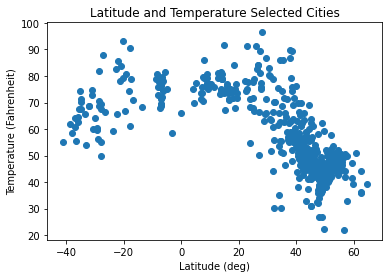

In [9]:
fig1, ax1 = plt.subplots()
ax1.set_title('Latitude and Temperature Selected Cities')
ax1.set_xlabel('Latitude (deg)')
ax1.set_ylabel('Temperature (Fahrenheit)')
ax1.scatter(weather_df['lat'], weather_df['temp'])
plt.savefig('outputs/LatTemp.png')

This plot shows the relationship between a city's latitude and current temperature. It shows that cities near the equator tended to have higher temperatures while cities in further the equator have low temperatures. The correlation appears sinusoidal. 

## Latitude vs. Humidity Plot

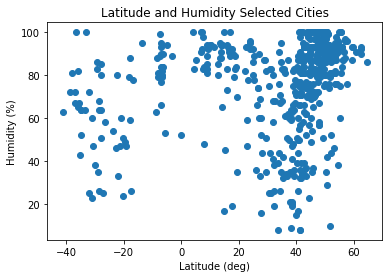

In [10]:
fig2, ax2 = plt.subplots()
ax2.set_title('Latitude and Humidity Selected Cities')
ax2.set_xlabel('Latitude (deg)')
ax2.set_ylabel('Humidity (%)')
ax2.scatter(weather_df['lat'], weather_df['humidity'])
plt.savefig('outputs/LatHumid.png')

This plot shows the relationship between a city's latitude and current humidity. It does not show an apparent relationship between humidity and latitude. 

## Latitude vs. Cloudiness Plot

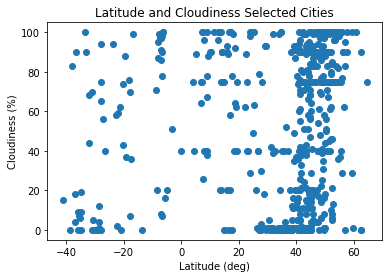

In [11]:
fig3, ax3 = plt.subplots()
ax3.set_title('Latitude and Cloudiness Selected Cities')
ax3.set_xlabel('Latitude (deg)')
ax3.set_ylabel('Cloudiness (%)')
ax3.scatter(weather_df['lat'], weather_df['clouds'])
plt.savefig('outputs/LatCloud.png')

This plot shows the relationship between a city's latitude and current cloudiness. It does not show an apparent relationship between cloudiness and latitude. 

## Latitude vs. Wind Speed Plot

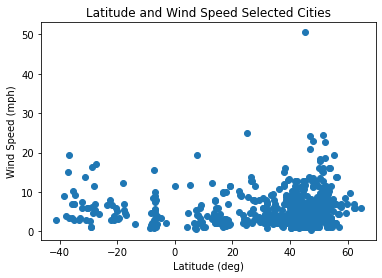

In [12]:
fig4, ax4 = plt.subplots()
ax4.set_title('Latitude and Wind Speed Selected Cities')
ax4.set_xlabel('Latitude (deg)')
ax4.set_ylabel('Wind Speed (mph)')
ax4.scatter(weather_df['lat'], weather_df['wind_spd'])
plt.savefig('outputs/LatWind.png')

This plot shows the relationship between a city's latitude and current wind speed. It does not show an apparent relationship between humidity and wind speed. 

## Linear Regression

In [13]:
# Split cities in norther nand southern hemispheres
north_cities = weather_df[weather_df['lat']>0]
south_cities = weather_df[weather_df['lat']<0]
north_cities

,name,country,clouds,humidity,temp,max_temp,wind_spd,lat,lon
1,Rodilana,ES,8,71,50.00,50.00,8.05,41.370590,-4.877980
2,Dörrenbach,DE,100,91,43.97,48.00,1.01,49.089722,7.961400
3,Heiiyugou,CN,100,50,41.40,41.40,2.75,40.804298,120.553680
4,Heilongjiang Sheng,CN,0,83,26.76,26.76,11.16,48.000000,128.000000
6,San Carlos del Zulia,VE,78,83,80.60,80.60,6.69,9.000030,-71.913521
...,...,...,...,...,...,...,...,...,...
595,Sundsvalls Kommun,SE,0,92,36.09,37.99,5.82,62.383331,17.299999
596,Egetswil,CH,40,86,41.49,42.01,4.70,47.471859,8.584510
597,Deleni,RO,18,71,54.01,55.00,5.82,46.549999,27.750000
598,Gemeente Oisterwijk,NL,90,93,45.43,46.99,4.70,51.566669,5.183330


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.599896432263603


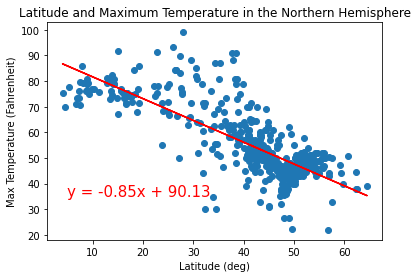

In [14]:
x_values = north_cities['lat']
y_values = north_cities['max_temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,35),fontsize=15,color="red")
plt.xlabel('Latitude (deg)')
plt.ylabel('Max Temperature (Fahrenheit)')
plt.title('Latitude and Maximum Temperature in the Northern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.15659057663139864


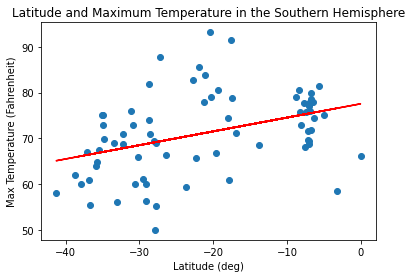

In [15]:
x_values = south_cities['lat']
y_values = south_cities['max_temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,45),fontsize=15,color="red")
plt.xlabel('Latitude (deg)')
plt.ylabel('Max Temperature (Fahrenheit)')
plt.title('Latitude and Maximum Temperature in the Southern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The two plots above show linear regressions for latitude and maximum temperature in the northern and southern hemispheres. The northern hemisphere shows a stronger, negative correlation, and the southern hemisphere shows a weaker, positive correlation. These results suggest that temperatures near the equator tend to be higher. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.028406771927116842


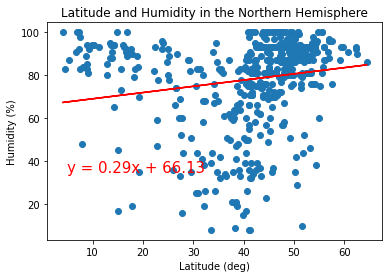

In [16]:
x_values = north_cities['lat']
y_values = north_cities['humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,35),fontsize=15,color="red")
plt.xlabel('Latitude (deg)')
plt.ylabel('Humidity (%)')
plt.title('Latitude and Humidity in the Northern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11984270675940727


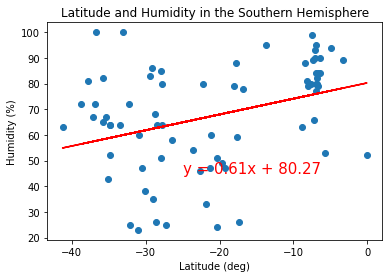

In [17]:
x_values = south_cities['lat']
y_values = south_cities['humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,45),fontsize=15,color="red")
plt.xlabel('Latitude (deg)')
plt.ylabel('Humidity (%)')
plt.title('Latitude and Humidity in the Southern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The two plots above show linear regressions for latitude and humidity in the northern and southern hemispheres. Both hemispheres do not show a correlation between these variables. Investigation of other geographic factors such as proximity to bodies of water may show better results.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.024120747676937542


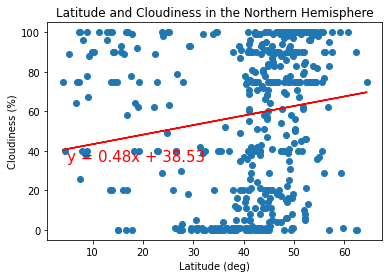

In [18]:
x_values = north_cities['lat']
y_values = north_cities['clouds']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,35),fontsize=15,color="red")
plt.xlabel('Latitude (deg)')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude and Cloudiness in the Northern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.20795138716384792


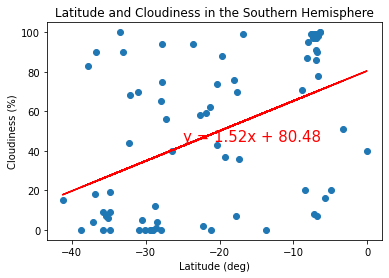

In [19]:
x_values = south_cities['lat']
y_values = south_cities['clouds']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,45),fontsize=15,color="red")
plt.xlabel('Latitude (deg)')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude and Cloudiness in the Southern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The two plots above show linear regressions for latitude and cloudiness in the northern and southern hemispheres. The northern hemisphere shows no correlation between cloudiness and latitude. The southern hemisphere shows a weak, positive correlation. It may suggest some relationship, but it also may be coincidence driven by unrelated weather phenomena.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005050756985592571


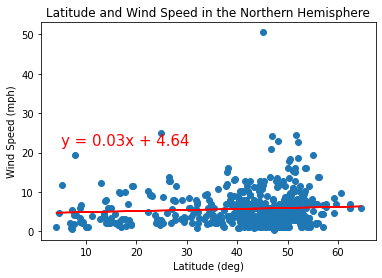

In [20]:
x_values = north_cities['lat']
y_values = north_cities['wind_spd']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,22),fontsize=15,color="red")
plt.xlabel('Latitude (deg)')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude and Wind Speed in the Northern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.043365295622967724


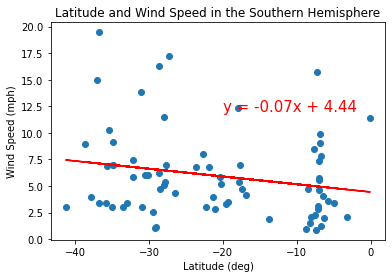

In [21]:
x_values = south_cities['lat']
y_values = south_cities['wind_spd']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,12),fontsize=15,color="red")
plt.xlabel('Latitude (deg)')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude and Wind Speed in the Southern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The two plots above show linear regressions for latitude and wind speed in the northern and southern hemispheres. Both hemispheres do not show a correlation between these variables. Investigation of other geographic factors such as proximity to bodies of water or mountain ranges may show better results.